In [306]:
# Steps of analysis:
# 1. Data Understanding
# 2. Data Wrangling
# 3. Data Visualization and Analysis
# 4. Conclusion

In [308]:
#importing Libraries for data manipulation
import pandas as pd #dataframe
import numpy as np #numerical python
#importing Libraries for data visualization
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #plotting
import plotly.express as px #plotting
# Warnings library will be used to ignore some warnings
import warnings #warning
warnings.filterwarnings('ignore')

In [310]:
#Loading the data and data dictionary via pandas's read methods for excel and csv
loan_data = pd.read_csv('C:\\Users\\CHAITANYA\\Desktop\\UpgradProjects\\Datascience\\loan.csv')
loan_dd = pd.read_excel('C:\\Users\\CHAITANYA\\Desktop\\UpgradProjects\\Datascience\\Data_Dictionary.xlsx')

In [312]:
#Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Setting style for seaonrn
sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

In [314]:
# Printing the data dictionary(first 5 rows)
loan_dd.head()

LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...

In [316]:
# Printing the data(first 5 rows)
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT    24000.00            Verified  Dec-11   Fully Paid   
1           RENT    30000.00     Source Verified  Dec-11  Charged Off   
2           RENT    12252.00        Not Verified  Dec-11   Fully Paid   
3           RENT    49200.00     Source Verified  Dec-11   Fully Paid   
4           RENT    80000.00     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state   dti  delinq_2yrs  \
0              Computer    860xx         AZ 27.65            0   
1                  bike    309xx         GA  1.00            0   
2  real estate business    606xx         IL  8.72            0   
3              personel    917xx         CA 20.00            0   
4              Personal    972xx         OR 17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                   35.00   
4           Jan-96               0                   38.00   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f       0.00           0.00      5863.16          5833.84   
1                   f       0.00           0.00      1008.71          1008.71   
2                   f       0.00           0.00      3005.67          3005.67   
3                   f       0.00           0.00     12231.89         12231.89   
4                   f     524.06         524.06      3513.33          3513.33   

   total_rec_prncp  total_rec_int  tota

In [318]:
#Basic information about the data
## Number of rows and columns
print('Number of Columns:',loan_data.shape[1])
print('Number of Rows:',loan_data.shape[0])
## Number of missing values
print('Number of missing values:',loan_data.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',loan_data.nunique().sum())
## Number of duplicates
print('Number of duplicates:',loan_data.duplicated().sum())

Number of Columns: 111
Number of Rows: 39717
Number of missing values: 2263366
Number of unique values: 416800
Number of duplicates: 0


In [320]:
# Basic infomation about the dataframe
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [322]:
# Data types of each column
print(loan_data.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [324]:
# Describing the dataframe
print(loan_data.describe())

              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count   39717.00   39717.00   39717.00     39717.00         39717.00   
mean   683131.91  850463.56   11219.44     10947.71         10397.45   
std    210694.13  265678.31    7456.67      7187.24          7128.45   
min     54734.00   70699.00     500.00       500.00             0.00   
25%    516221.00  666780.00    5500.00      5400.00          5000.00   
50%    665665.00  850812.00   10000.00      9600.00          8975.00   
75%    837755.00 1047339.00   15000.00     15000.00         14400.00   
max   1077501.00 1314167.00   35000.00     35000.00         35000.00   

       installment  annual_inc      dti  delinq_2yrs  inq_last_6mths  \
count     39717.00    39717.00 39717.00     39717.00        39717.00   
mean        324.56    68968.93    13.32         0.15            0.87   
std         208.87    63793.77     6.68         0.49            1.07   
min          15.69     4000.00     0.00         0.00           

In [326]:
# Columns in the dataframe
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [328]:
## Checking for missing values
print(loan_data.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [330]:
# Checking column with large amount of null values(in percentage) and irrelevant columns
print((loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False))

verification_status_joint   100.00
annual_inc_joint            100.00
mo_sin_old_rev_tl_op        100.00
mo_sin_old_il_acct          100.00
bc_util                     100.00
                             ...  
delinq_amnt                   0.00
policy_code                   0.00
earliest_cr_line              0.00
delinq_2yrs                   0.00
id                            0.00
Length: 111, dtype: float64


In [332]:
# Removing column with 50% or more null values as it will reduce the impact on analysis
loan_data = loan_data.loc[:,loan_data.isnull().sum()/loan_data.shape[0]*100<50]
# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 54)


In [334]:
# Checking columns again for null value percentage
print((loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False))

desc                         32.59
emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
total_rec_prncp               0.00
out_prncp                     0.00
initial_list_status           0.00
out_prncp_inv                 0.00
total_acc                     0.00
total_pymnt                   0.00
total_pymnt_inv               0.00
collection_recovery_fee       0.00
total_rec_int                 0.00
total_rec_late_fee            0.00
recoveries                    0.00
pub_rec                       0.00
last_pymnt_amnt               0.00
policy_code                   0.00
application_type              0.00
acc_now_delinq                0.00
delinq_amnt                   0.00
revol_bal           

In [336]:
# Columns in the dataframe
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [338]:
# Checking for missing values across the rows
print((loan_data.isnull().sum(axis=1)).max())

6


In [340]:
# Removing irrelevant columns which are calculated after loan is approved thus have no relevance to the analysis
## The columns removed are customer behaviour variables and are calculated after thus they cannot be used as input for the analysis
loan_data=loan_data.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)
# Removing desc,emp_title,desc as they have no significance to the analysis as they are random varaibles and hold infomration which might not have significance to the conclusions
loan_data=loan_data.drop(['title','emp_title','desc','url'],axis=1)
# Removing zip_code as it is a masked data and cannot be used as input for the analysis
loan_data=loan_data.drop(['zip_code'],axis=1)
# Removing member_id as it is a duplicate index column and is not required for the analysis
loan_data=loan_data.drop(['member_id'],axis=1)
# Removing funded_amnt_inv as it is a internal data and is calculated after loan approval thus cannot be used as input for the analysis
loan_data=loan_data.drop(['funded_amnt_inv'],axis=1)
# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 26)


In [342]:
# Checking columns for irrelevant data which has no impact to analysis(having very few unqiue values)
print(loan_data.nunique().sort_values(ascending=True))

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64


In [344]:
# Removing irrelevant columns which contain 1 unique value
loan_data = loan_data.loc[:,loan_data.nunique()>1]
# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 18)


In [346]:
# Columns in the dataframe
print(loan_data.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')


In [348]:
# Checking for missing values across the dataframe
print(loan_data.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64


In [350]:
# Checking values in emp_length columns for feasibility of inserting null values
print(loan_data.emp_length.value_counts())

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64


In [352]:
# Checking values in pub_rec_bankruptcies columns for feasibility of inserting null values
print(loan_data.pub_rec_bankruptcies.value_counts())

pub_rec_bankruptcies
0.00    37339
1.00     1674
2.00        7
Name: count, dtype: int64


In [354]:
# Removing null values in emp_title and emp_length columns
loan_data = loan_data.dropna(subset=['emp_length'])
# Shape of the dataframe after removing columns
print(loan_data.shape)

(38642, 18)


In [356]:
# Inserting 0 for null values in pub_rec_bankruptcies column
loan_data.pub_rec_bankruptcies.fillna(0,inplace=True)

In [358]:
# Checking for missing values across the dataframe
print(loan_data.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


In [360]:
# Shape of the dataframe
print(loan_data.shape)

(38642, 18)


In [362]:
# Removing duplicate rows in the dataframe
loan_data = loan_data.drop_duplicates()
# Shape of the dataframe after removing duplicate rows
print(loan_data.shape)

# No duplicate rows found in the dataframe

(38642, 18)


In [364]:
# Checking information about the dataframe
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state            38

In [366]:
# Correcting data type and format for columns in the dataframe
## Derving more columns with the conversion of data type
loan_data.term=loan_data.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
loan_data.int_rate=loan_data.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
loan_data.grade=loan_data.grade.astype('category')
loan_data.sub_grade=loan_data.sub_grade.astype('category')
loan_data.emp_length=loan_data.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
loan_data.home_ownership=loan_data.home_ownership.astype('category')
loan_data.verification_status=loan_data.verification_status.astype('category')
loan_data.issue_d=pd.to_datetime(loan_data.issue_d,format='%b-%y')
loan_data['issue_year']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.year
loan_data['issue_month']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.month
# loan_data.loan_status=loan_data.loan_status.apply(lambda x: x.replace('Fully Paid','0').replace('Charged Off','1').replace('Current','2')).astype('int')
loan_data.purpose=loan_data.purpose.astype('category')
loan_data.addr_state=loan_data.addr_state.astype('category')

In [368]:
# Setting decimal point limit for all data 
for x in loan_data.columns:
    if(loan_data[x].dtype=='float64'):
      loan_data[x]=loan_data[x].round(2)
      
loan_data.head()

id  loan_amnt  funded_amnt  term  int_rate  installment grade  \
0  1077501       5000         5000    36     10.65       162.87     B   
1  1077430       2500         2500    60     15.27        59.83     C   
2  1077175       2400         2400    36     15.96        84.33     C   
3  1076863      10000        10000    36     13.49       339.31     C   
4  1075358       3000         3000    60     12.69        67.79     B   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2       10.00           RENT    24000.00            Verified   
1        C4        0.50           RENT    30000.00     Source Verified   
2        C5       10.00           RENT    12252.00        Not Verified   
3        C1       10.00           RENT    49200.00     Source Verified   
4        B5        1.00           RENT    80000.00     Source Verified   

     issue_d  loan_status         purpose addr_state   dti  \
0 2011-12-01   Fully Paid     credit_card         AZ 27.65   
1 2011-12-01  Charged Off             car         GA  1.00   
2 2011-12-01   Fully Paid  small_business         IL  8.72   
3 2011-12-01   Fully Paid           other         CA 20.00   
4 2011-12-01      Current           other         OR 17.94   

   pub_rec_bankruptcies  issue_year  issue_month  
0                  0.00        2011           12  
1                  0.00        2011           12  
2                  0.00        2011           12  
3                  0.00        2011           12  
4                  0.00        2011           12

In [370]:
# Removing loans with status as 'Current'
loan_data = loan_data[loan_data.loan_status!='Current']
# Shape of the dataframe after removing columns
print(loan_data.shape)

(37544, 20)


In [372]:
# selecting columns based on domain knowledge
## Id, Loan Amount, Term of loan, Interest Rate, Grade, Sub Grade, Emp Length, Home Ownership, Verification Status, Annual Income, Loan Status,Purpose of Loan, State provided by burrower, DTI ratio, Number of public record bankruptcies and derived columns of Issue month and year
loan_data = loan_data[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_year','issue_month']]
# Shape of the dataframe after removing columns
loan_data.shape

(37544, 17)

In [374]:
# Divding the column as per categorical and numerical
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
cont_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

In [376]:
# Checking outlier values in continuous columns via box plot
## The continuous columns are loan_amnt, int_rate, annual_inc, dti whereas the categorical columns are term, grade, sub_grade, emp_length, home_ownership, verification_status, purpose, addr_state, issue_month, issue_year, pub_rec_bankruptcies
## We will check outlier using box plot and then remove the outliers as per requirement

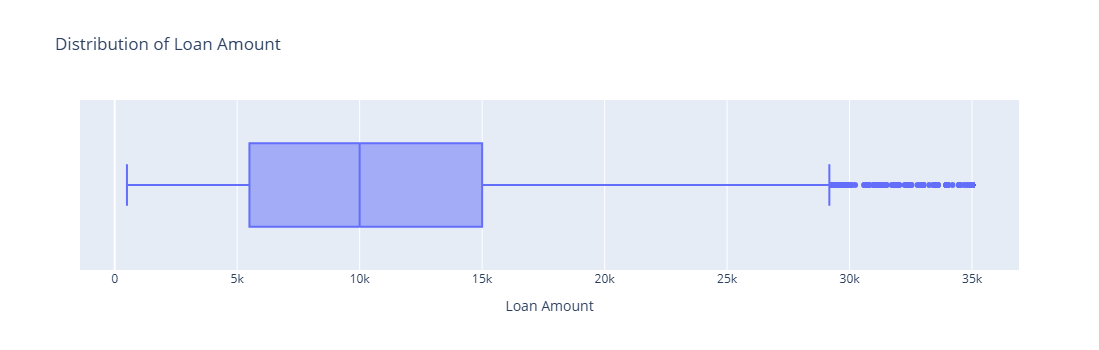

In [378]:
## starting with loan_amnt
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()
## Upper fence turns out to be 29.175k =29175 whereas max is 35k=35000 which is not much more then upper fence thus will not have much impact on the analysis.

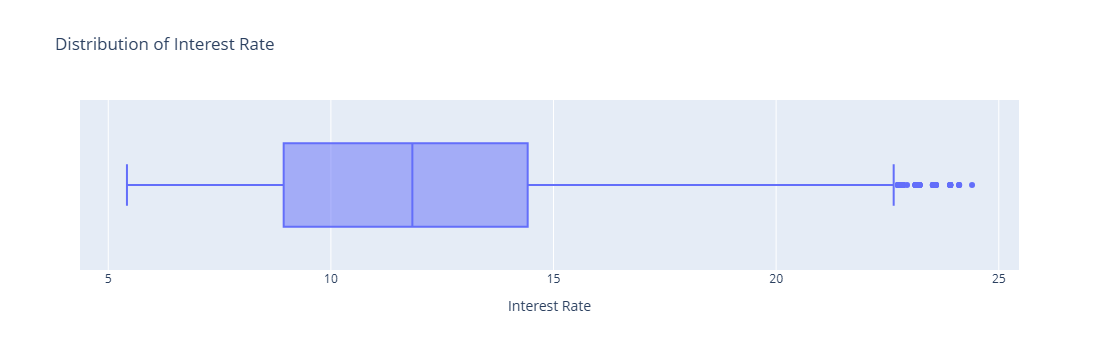

In [380]:
## starting with int_rate
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data,x='int_rate',width=750,height=350,title='Distribution of Interest Rate',labels={'int_rate':'Interest Rate'}).show()
## Upper fence turns out to be 22.64 whereas max is 24.4 which is not much more then upper fence thus will not have much impact on the analysis.

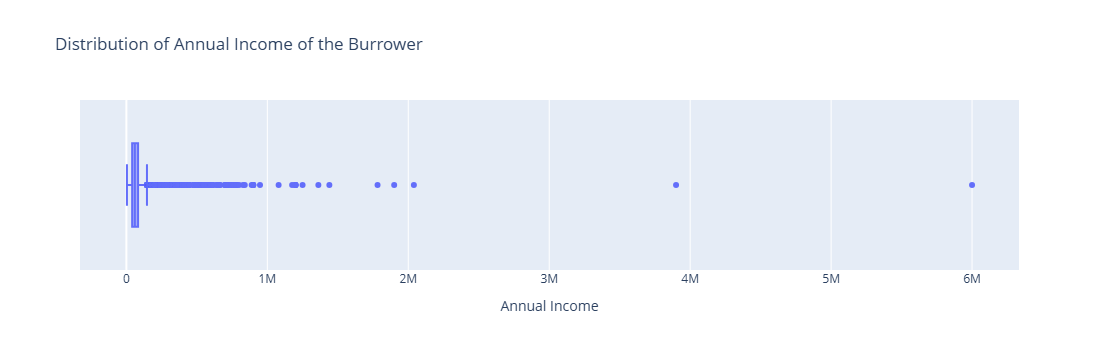

In [382]:
## starting with annual_inc
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data,x='annual_inc',width=750,height=350,title='Distribution of Annual Income of the Burrower',labels={'annual_inc':'Annual Income'}).show()
## Upper fence turns out to be 146k whereas max is 6000k which is much from upper fence thus we will remove the outliers in column annual_inc.

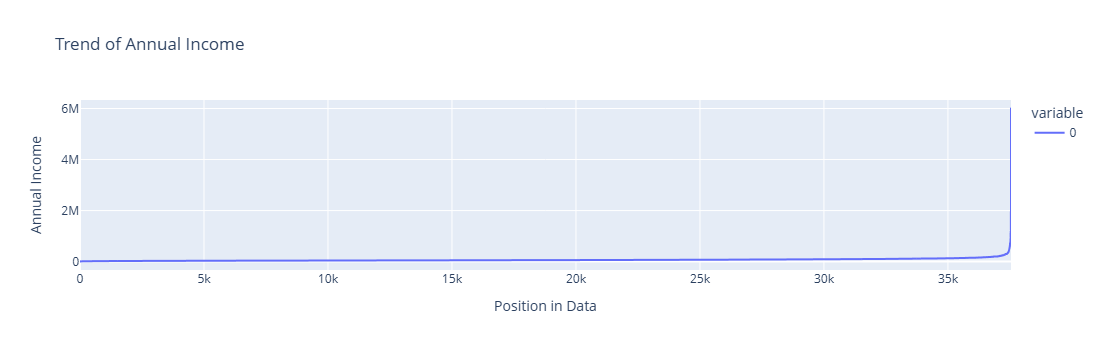

In [384]:
## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(loan_data.annual_inc),width=750,height=350,title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()

In [386]:
## Removing outliers in annual_inc greater than 99th percentile
loan_data = loan_data[loan_data.annual_inc<=np.percentile(loan_data.annual_inc,99)]

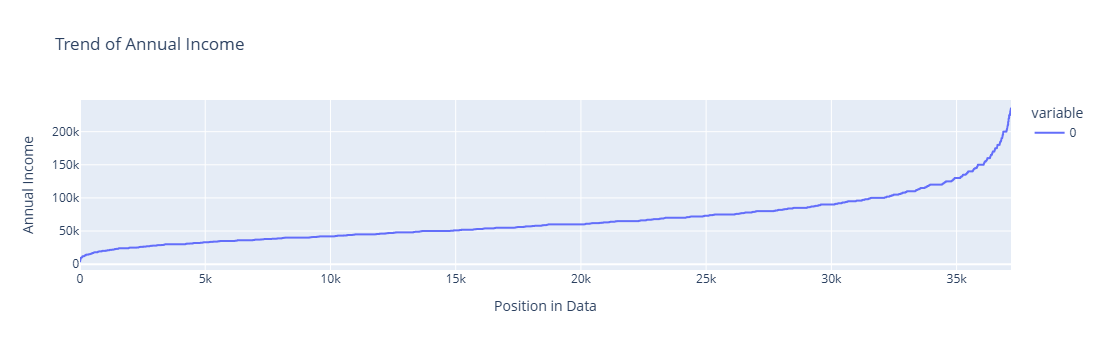

In [388]:
## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(loan_data.annual_inc),width=750,height=350,title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()

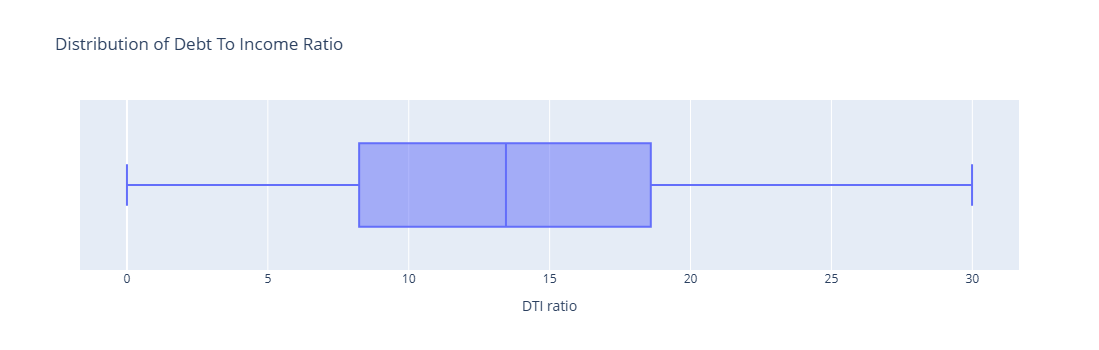

In [390]:
## starting with dti
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data,x='dti',width=750,height=350,title='Distribution of Debt To Income Ratio',labels={'dti':'DTI ratio'}).show()
## There are no outliers in dti hence we can move ahead with analysis.

loan_status
Fully Paid    85.58
Charged Off   14.42
Name: count, dtype: float64


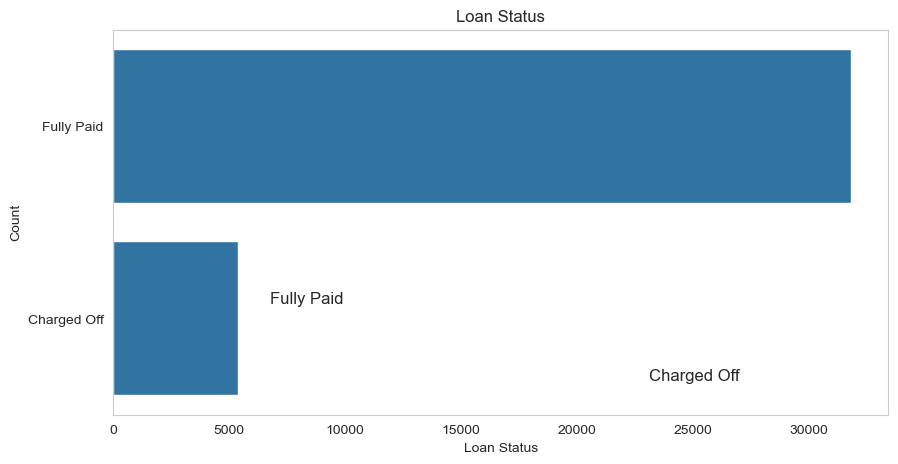

In [392]:
#Univariate Analysis
# Loan status 
print(loan_data.loan_status.value_counts()*100/loan_data.loan_status.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(loan_data.loan_status)
ax.annotate('Fully Paid',xy=(0.25,0.3),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.annotate('Charged Off',xy=(0.75,0.1),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.set_title('Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plt.show()

count   37173.00
mean    11034.82
std      7272.29
min       500.00
25%      5400.00
50%      9800.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64


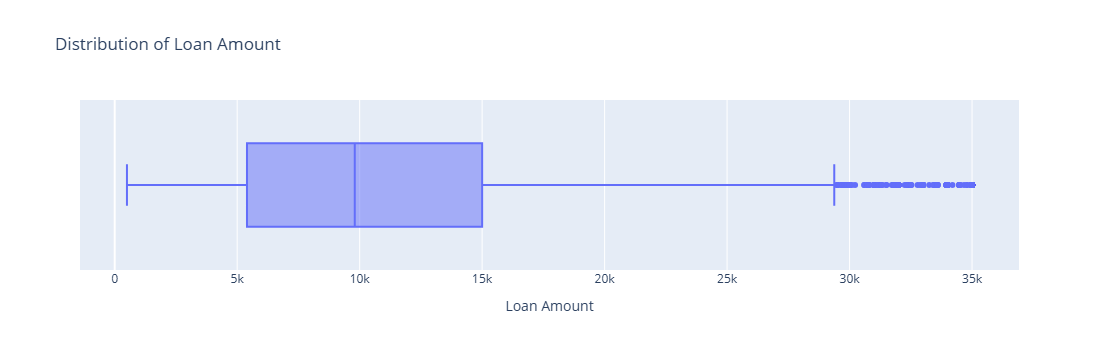

In [394]:
# Loan Amount
print(loan_data.loan_amnt.describe())
#Plotting histogram of loan amount
px.box(loan_data,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

term
36   75.38
60   24.62
Name: count, dtype: float64


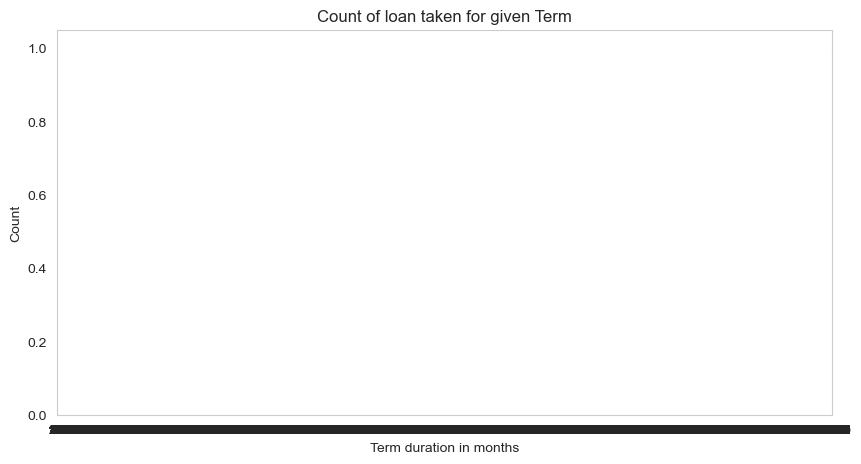

In [396]:
# Term of loan 
print(loan_data.term.value_counts()*100/loan_data.term.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(loan_data.term)
ax.set_title('Count of loan taken for given Term')
ax.set_xlabel('Term duration in months')
ax.set_ylabel('Count')
plt.show()

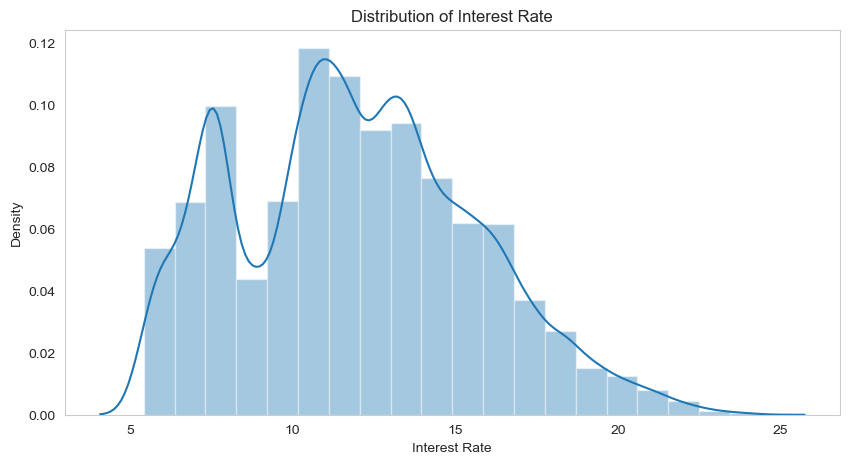

In [398]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(loan_data.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

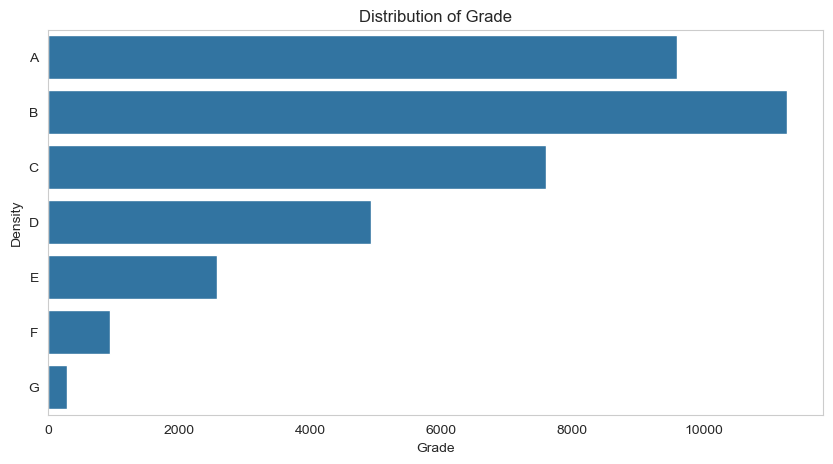

In [400]:
# Distribution of Greade
plt.figure(figsize=(10,5))
sns.countplot(loan_data.grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Grade')
plt.show()

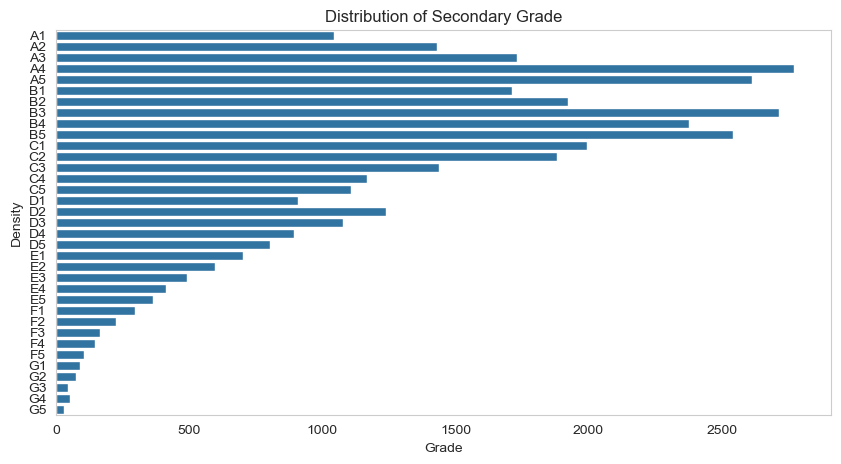

In [402]:
# Distribution of Greade
plt.figure(figsize=(10,5))
sns.countplot(loan_data.sub_grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Secondary Grade')
plt.show()

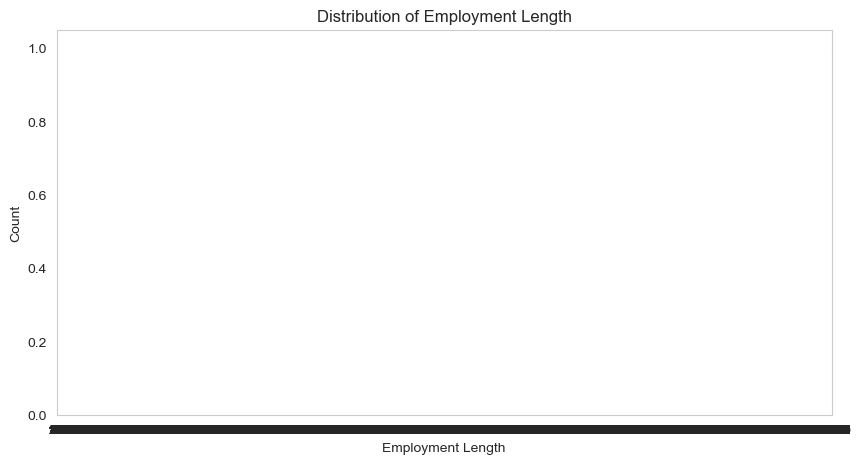

In [404]:
# Distribution of emp_length
plt.figure(figsize=(10,5))
sns.countplot(loan_data.emp_length)
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length',fontsize=12)
plt.show()

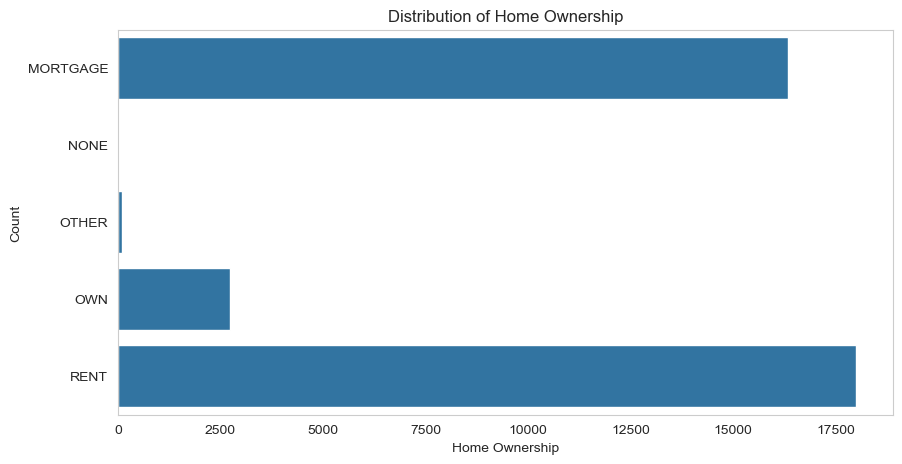

In [406]:
# Distribution of home_ownership
plt.figure(figsize=(10,5))
sns.countplot(loan_data.home_ownership)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontsize=12)
plt.show()

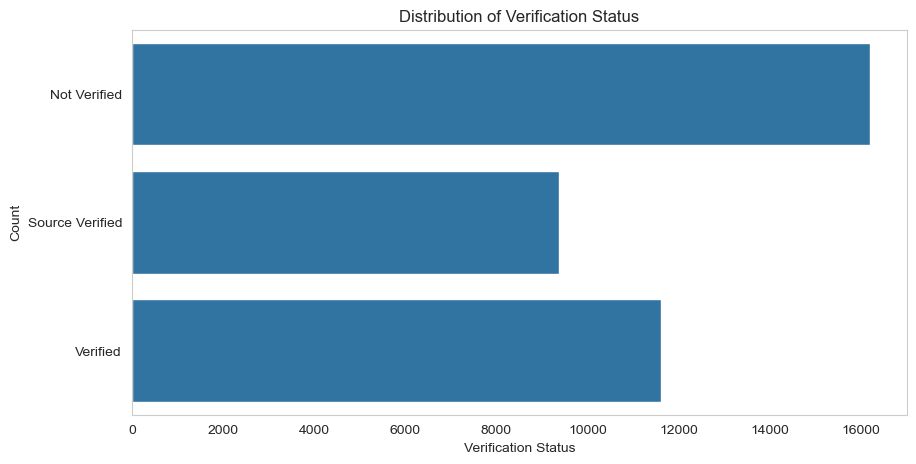

In [408]:
# Distribution of verification_status
plt.figure(figsize=(10,5))
sns.countplot(loan_data.verification_status)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status',fontsize=12)
plt.show()

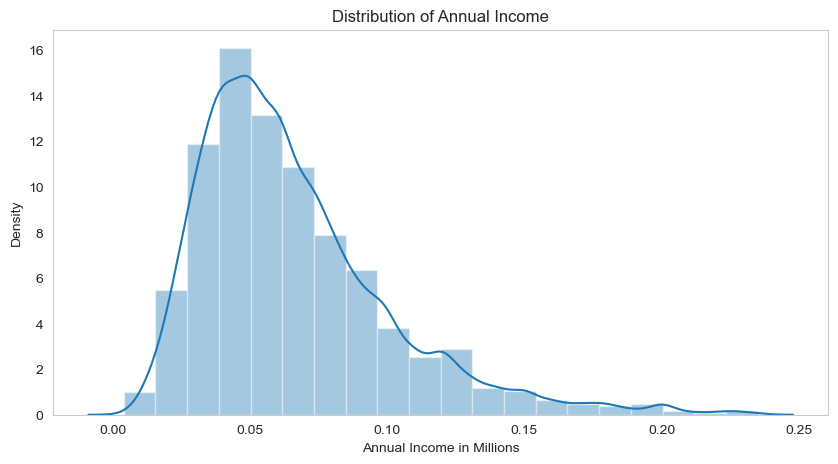

In [410]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sns.distplot(loan_data.annual_inc/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

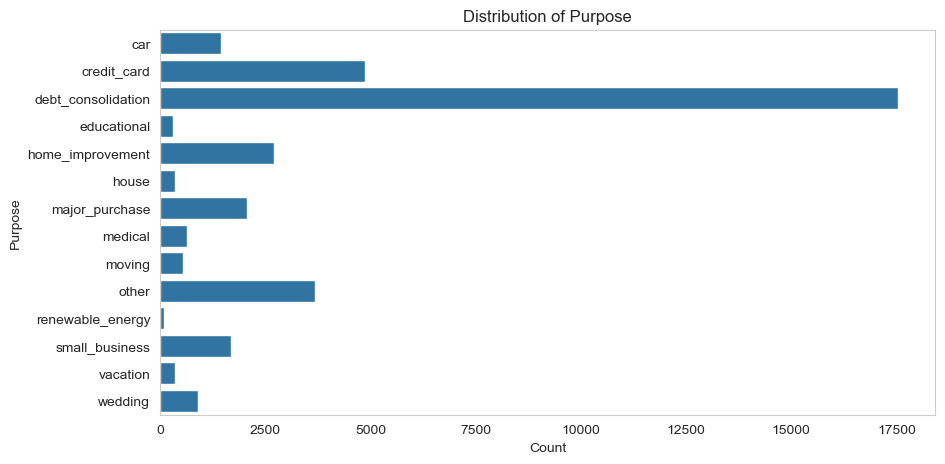

In [412]:
# Distribution of purpose
plt.figure(figsize=(10,5))
sns.countplot(y=loan_data.purpose)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()

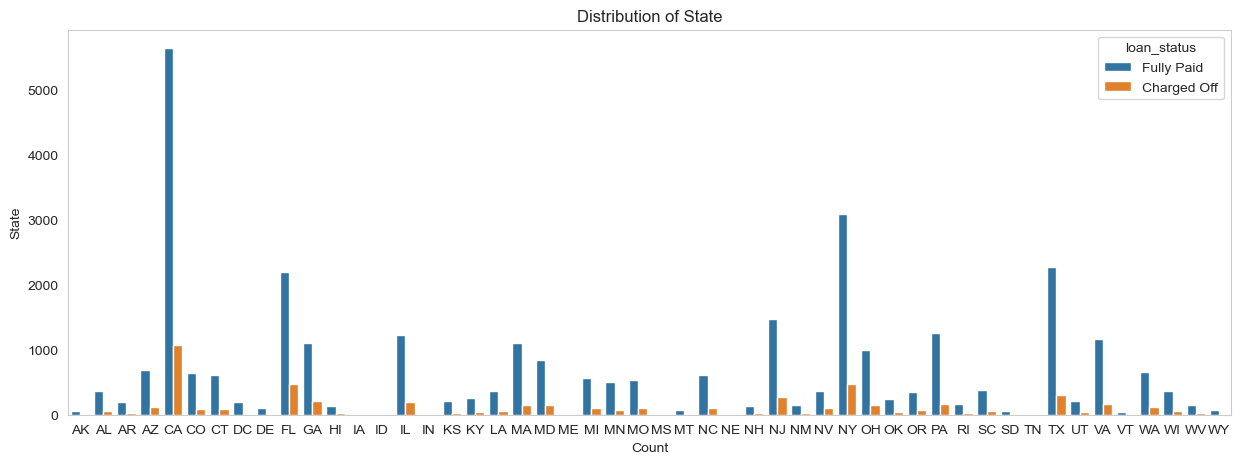

In [414]:
# Distribution of addr_state
plt.figure(figsize=(15,5))
sns.countplot(x=loan_data.addr_state,hue=loan_data.loan_status)
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Distribution of State',fontsize=12)
plt.show()

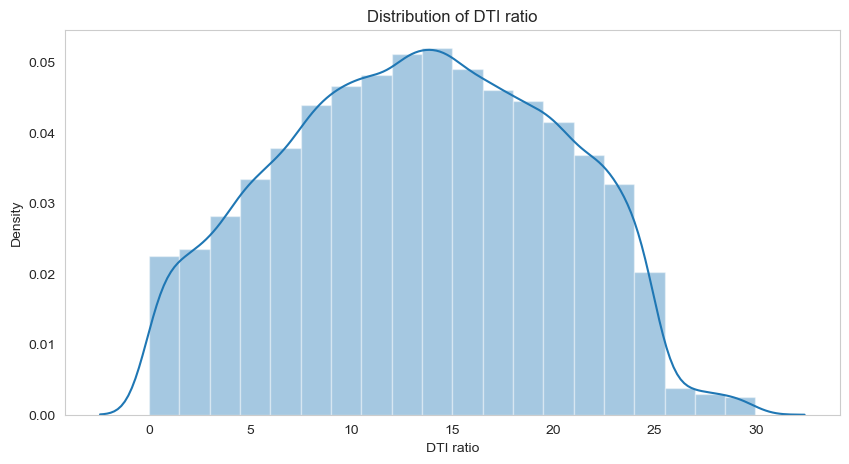

In [416]:
# Distribution of dti
plt.figure(figsize=(10,5))
sns.distplot(loan_data.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

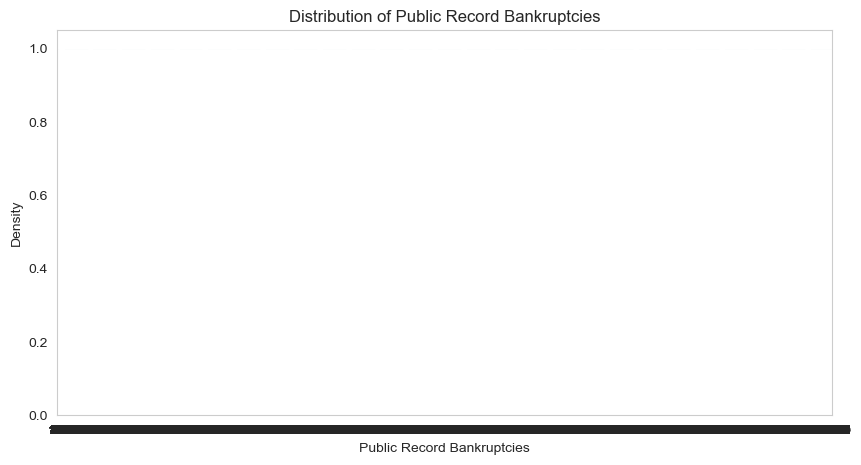

In [418]:
# Distribution of pub_rec_bankruptcies
plt.figure(figsize=(10,5))
sns.countplot(loan_data.pub_rec_bankruptcies)
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Density')
plt.title('Distribution of Public Record Bankruptcies',fontsize=12)
plt.show()

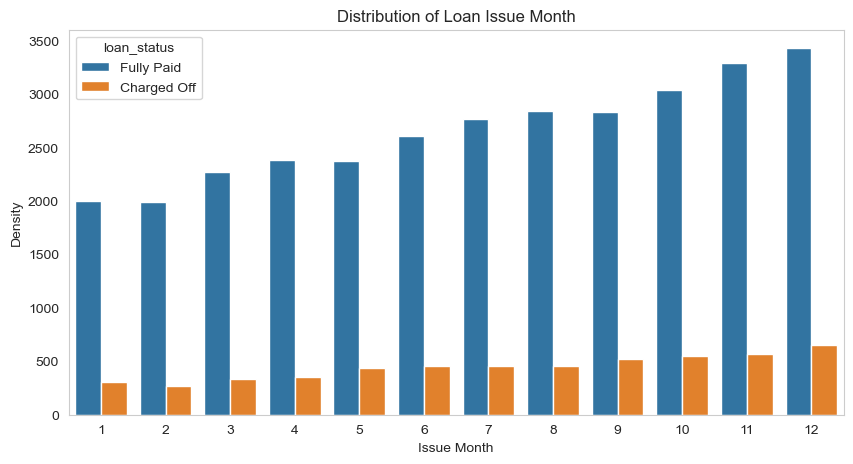

In [420]:
# Distribution of issue_month
plt.figure(figsize=(10,5))
sns.countplot(x=loan_data.issue_month,hue=loan_data.loan_status)
plt.xlabel('Issue Month')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Month',fontsize=12)
plt.show()

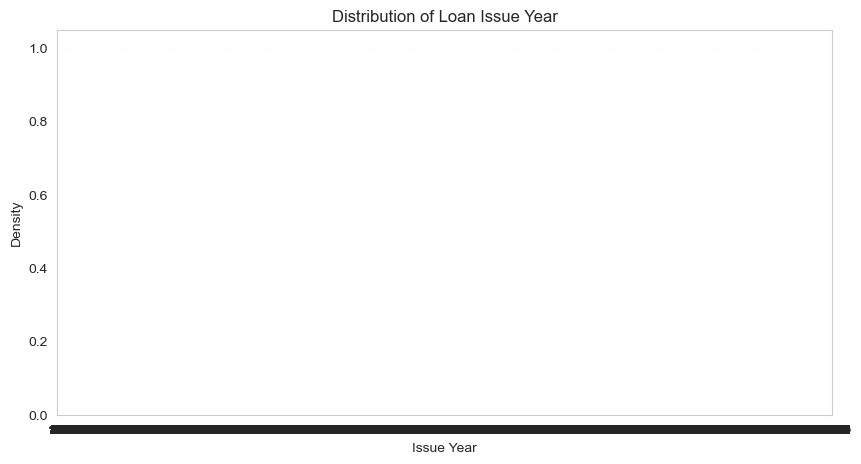

In [422]:
# Distribution of issue_year
plt.figure(figsize=(10,5))
sns.countplot(loan_data.issue_year)
plt.xlabel('Issue Year')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Year',fontsize=12)
plt.show()

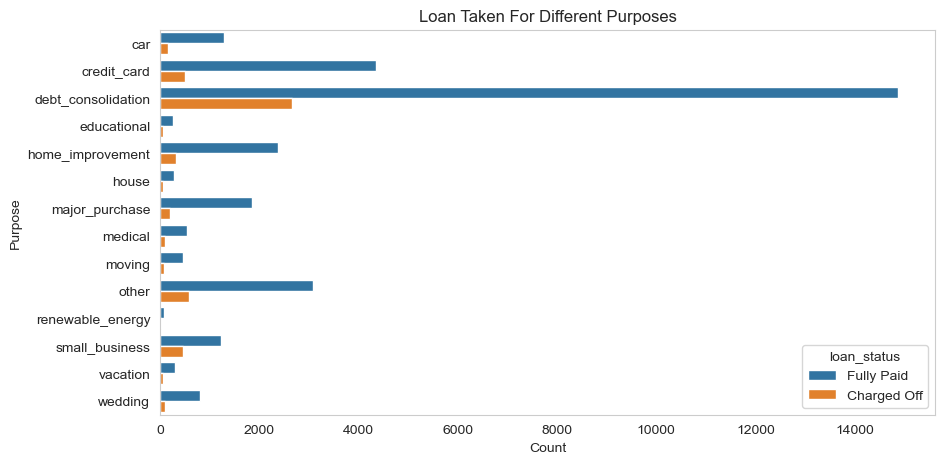

In [424]:
#Segmented Univariate Analysis
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

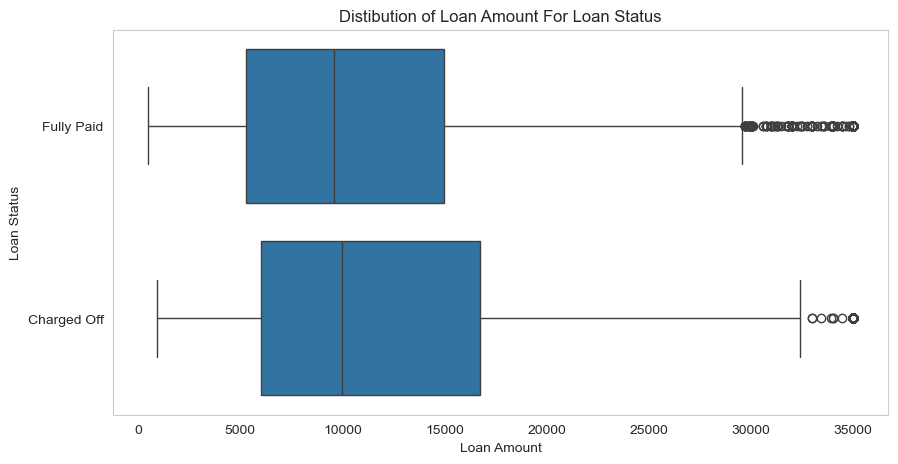

In [426]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

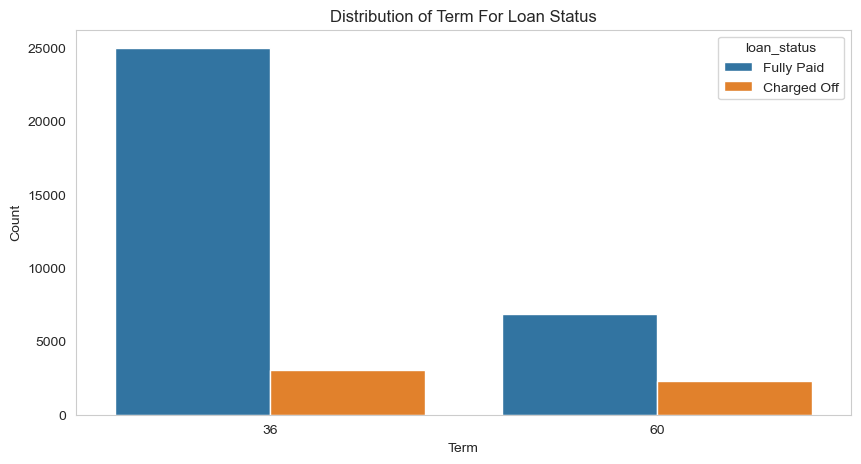

In [428]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

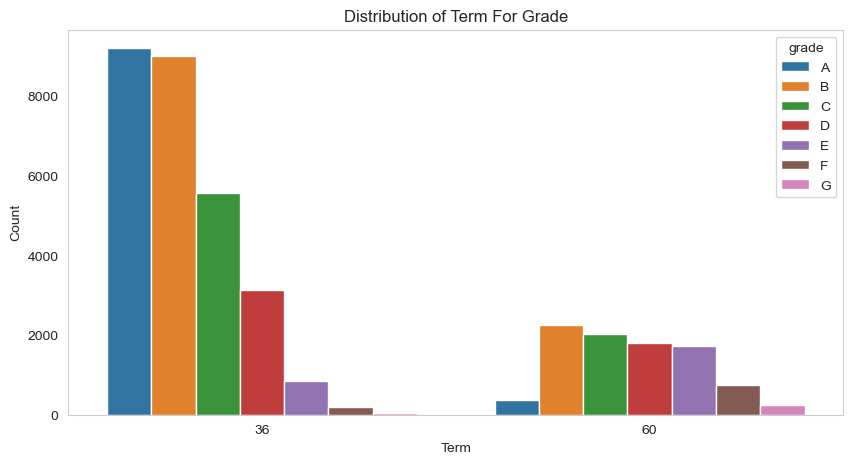

In [430]:
# Distribution of Term based on Grade
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade',fontsize=12)
plt.show()

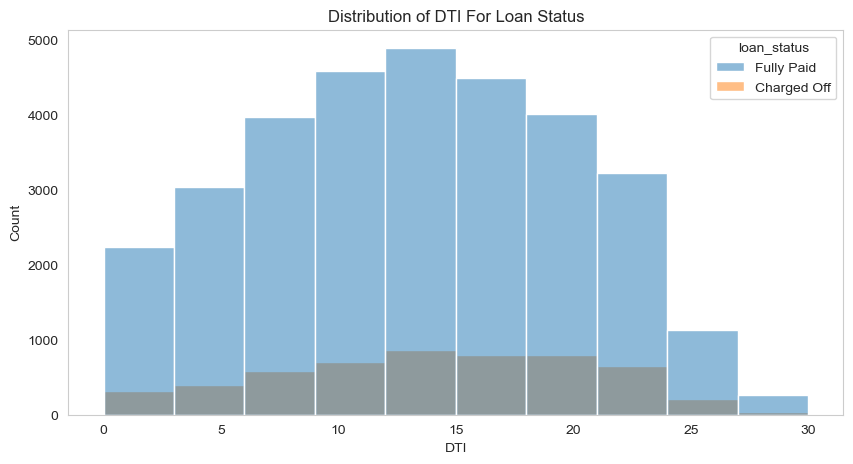

In [432]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

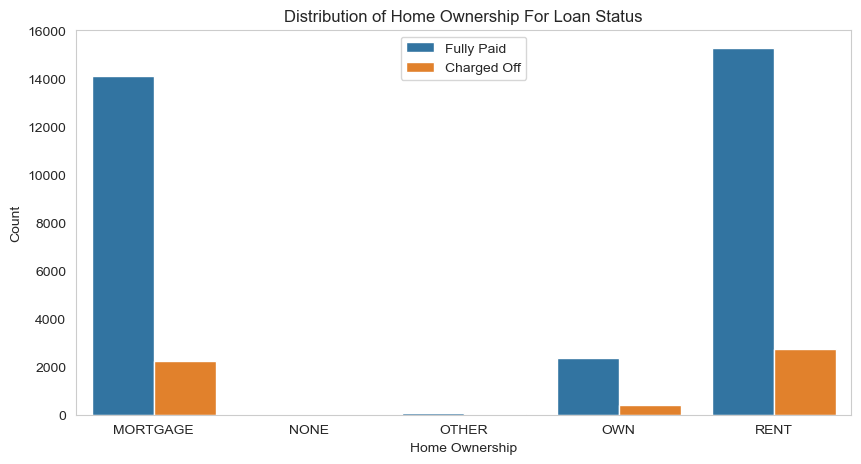

In [434]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

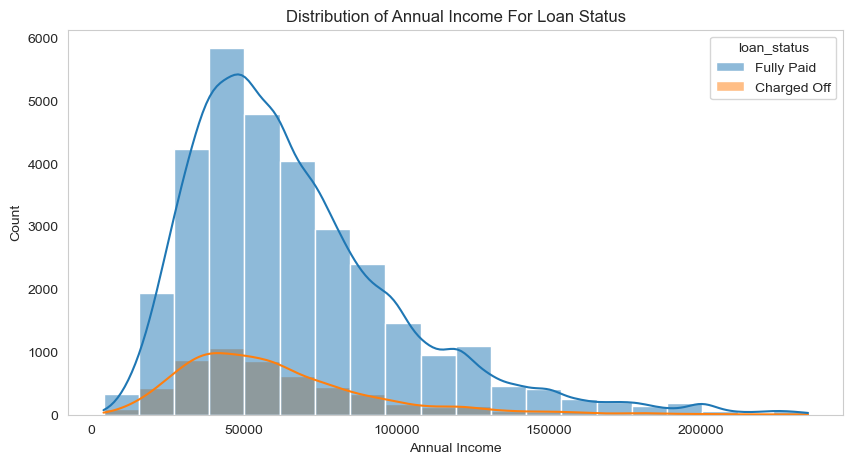

In [436]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

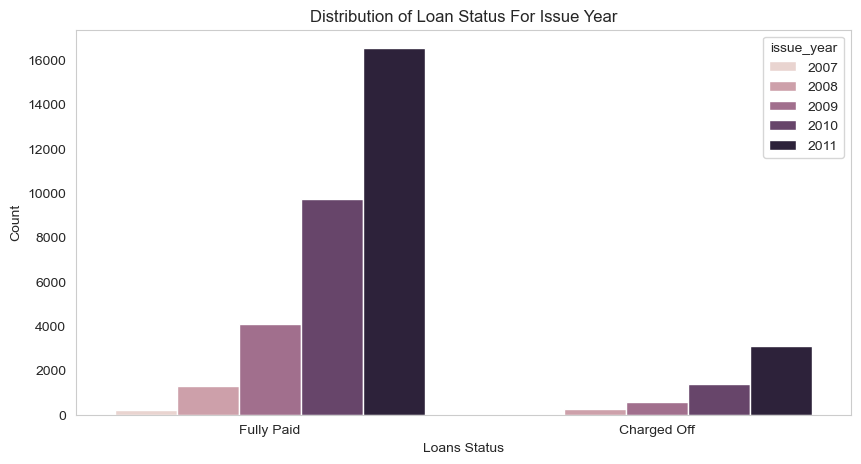

In [438]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()

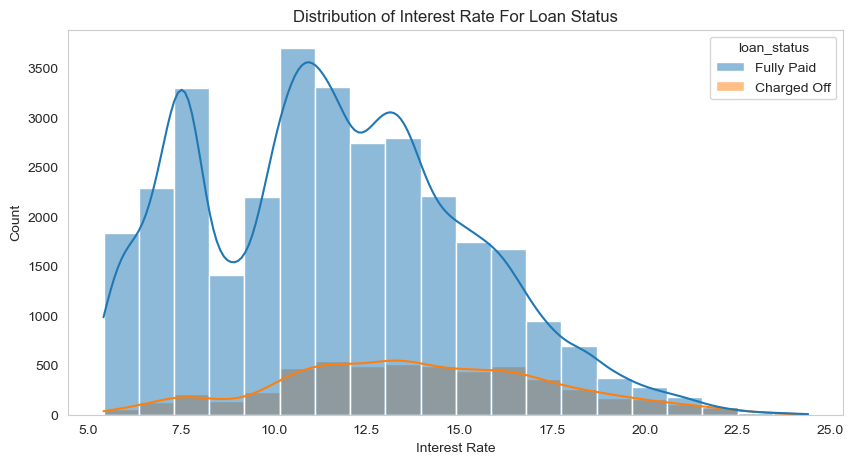

In [440]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

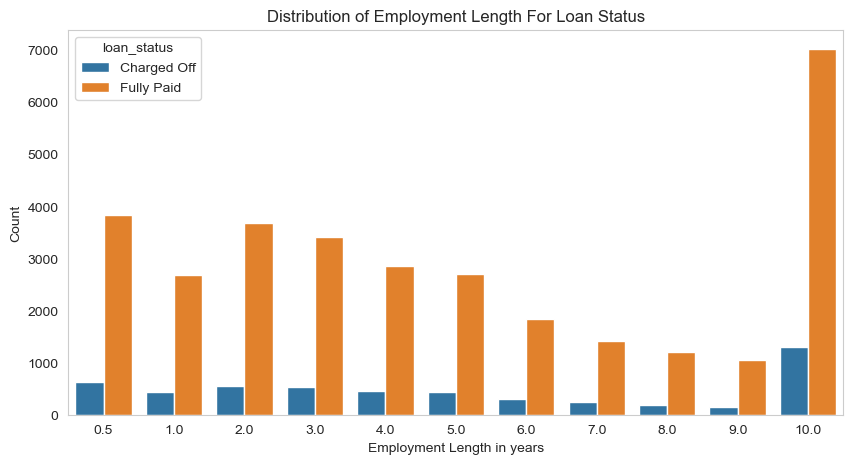

In [442]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

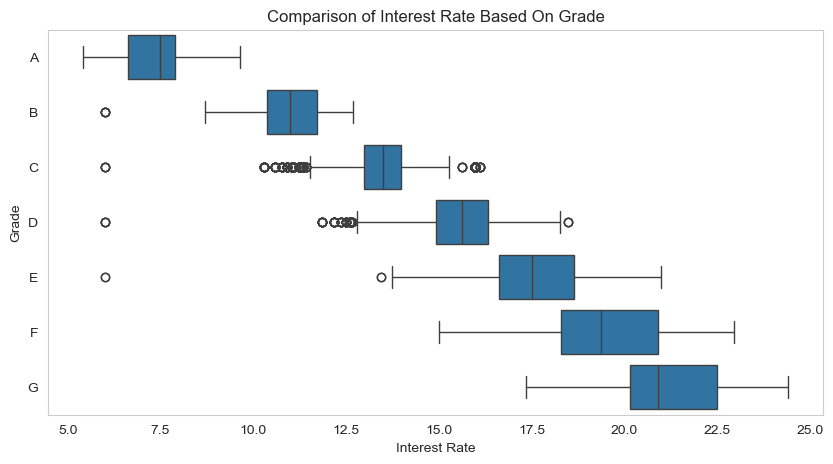

In [444]:
#Bivariate Analysis

# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

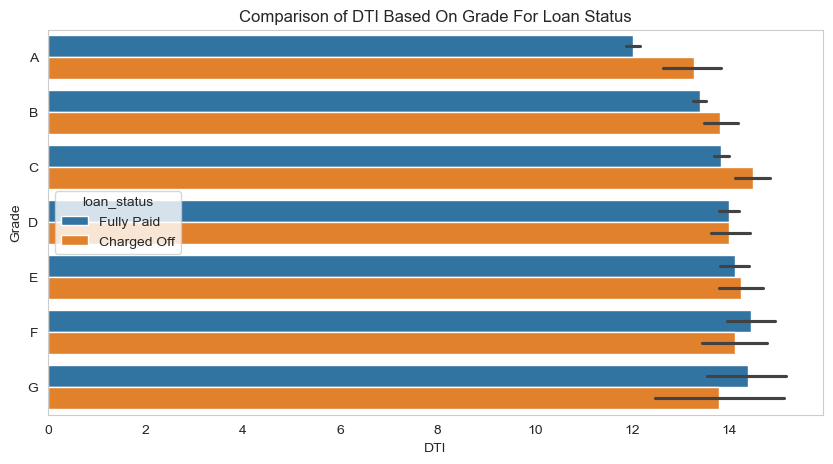

In [446]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=loan_data,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

<Figure size 1000x500 with 0 Axes>

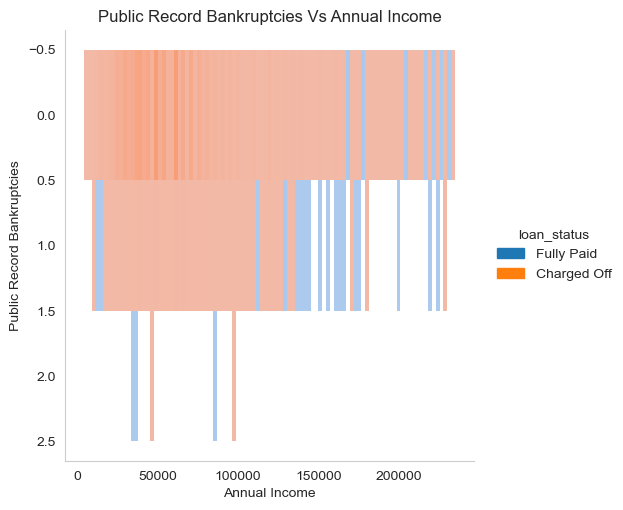

In [448]:
# Comparison of annual income to public record bankruptcy over loan status
plt.figure(figsize=(10,5))
sns.displot(y=loan_data.pub_rec_bankruptcies.astype('category'),x=loan_data.annual_inc,hue=loan_data.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Annual Income',fontsize=12)
plt.show()

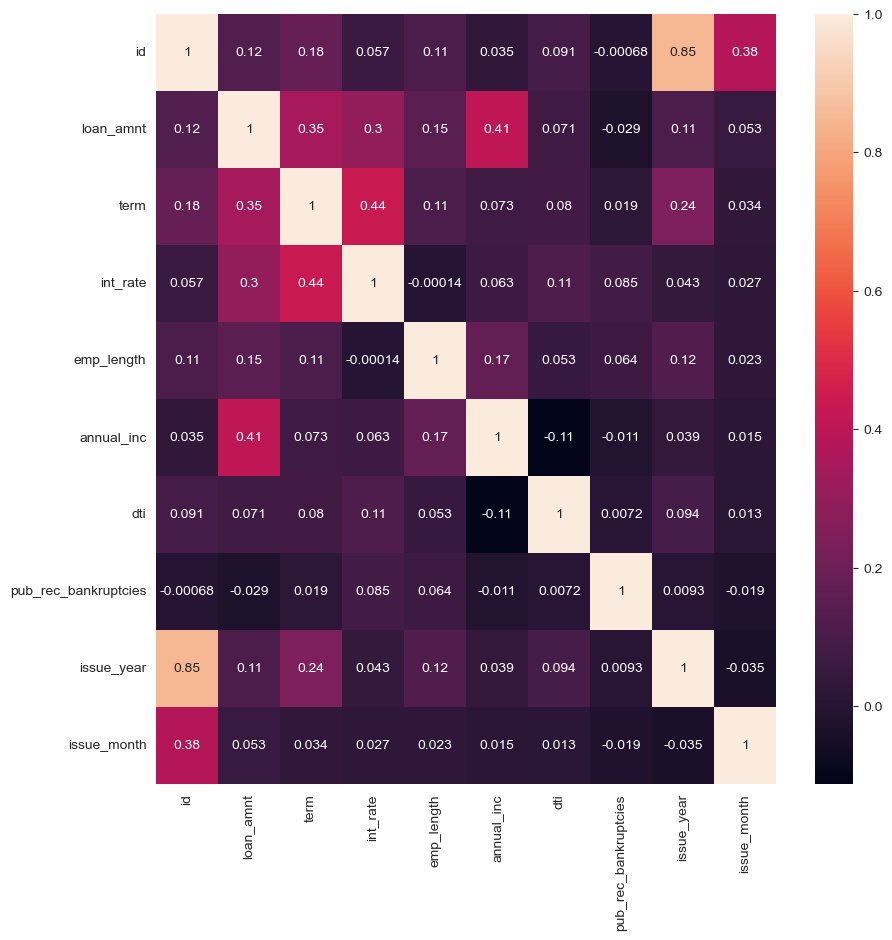

In [450]:
# Heatmap of correlation between variables
loan_data.dtypes

loan_data = loan_data.select_dtypes(include=[float, int])

plt.figure(figsize=(10,10))
sns.heatmap(loan_data.corr(),annot=True)
plt.show()

In [ ]:
#Insights

##Univariate Analysis

    ###The number of defaulted loan is 7 times less than the number of fully paid loan.
    ###The majority of loan has a term of 36 months compared to 60 months.
    ###The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.
    ###A large amoutn of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.
    ###Majority of borrowsers have working experience greater than 10 years.
    ###Majority of borrowsers don't posses property and are on mortage or rent.
    ###About 50% of the borrowers are verified by the company or have source verified.
    ###Annual Income shows left skewed normal distribution thus we can say that the majorityof burrowers have very low annual income compared to rest.
    ###A large percentage of loans are taken for debt consolidation followed by credit card.
    ###Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.
    ###Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.
    ###Majority of the borrowers have no record of Public Recorded Bankruptcy.
    ###Majority of the loans are given in last quarter of the year.
    ###The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

#Segmented Univariate Analysis

    ###Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.
    ###The mean and 25% are same for both but we see larger 75% in the defaulted loan which indicate large amount of loan has higher chance of defaulting.
    ###The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.
    ###The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.
    ###The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.
    ###The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.
    ###Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.
    ###The Fully paid loan are increasing exponentially with the time compared to defaulted loan.
    ###The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.
    ###The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

#Bivariate Analysis

    ###The Grade represent risk factor thus we can say interst rate increases with the risk.
    ###The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
    ###The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

#Recommendations

##Major Driving factor which can be used to predict the chance of defaulting and avoiding Credit Loss:

    ###DTI
    ###Grades
    ###Verification Status
    ###Annual income
    ###Pub_rec_bankruptcies
##Other considerations for 'defaults' :
    ###Burrowers not from large urban cities like california, new york, texas, florida etc.
    ###Burrowers having annual income in the range 50000-100000.
    ###Burrowers having Public Recorded Bankruptcy.
    ###Burrowers with least grades like E,F,G which indicates high risk.
    ###Burrowers with very high Debt to Income value.
    ###Burrowers with working experience 10+ years.